# Análisis de imagen con el servicio Computer Vision

![Un robot sujetando una fotografía](./images/computer_vision.jpg)

*Computer Vision* forma parte de la inteligencia artificial y explora el desarrollo de sistemas de IA que pueden “ver” el mundo, ya sea en tiempo real mediante una cámara o mediante el análisis de archivos de imágenes y vídeos. Esto es posible gracias a que las imágenes digitales son, básicamente, un conjunto de valores numéricos de píxeles que podemos usar como *características* para entrenar modelos de aprendizaje automático que puedan clasificar imágenes, detectar determinados objetos en una imagen e incluso generar resúmenes textuales sobre las fotografías.

## Usar Computer Vision, de Cognitive Services

Microsoft Azure incluye los conocidos como *Cognitive Services*, entre los que encontramos funciones habituales de IA, incluidas algunas que pueden ayudar a crear soluciones de Computer Vision.

*Computer Vision* es un punto de inicio natural de nuestra explicación de Computer Vision en Azure. Utiliza modelos de aprendizaje automático entrenados previamente para analizar imágenes y extraer información sobre ellas.

Por ejemplo, supongamos que la empresa Northwind Traders ha decidido implementar una tienda inteligente, en la que los servicios de IA supervisan la tienda para identificar a los clientes que necesiten ayuda y avisar a los empleados para que los ayuden. Gracias al servicio Computer Vision, las imágenes de las cámaras de la tienda se pueden analizar para proporcionar descripciones acertadas sobre lo que aparece en ellas.

### Crear un recurso de Cognitive Services

Para empezar, cree un recurso de **Cognitive Services** en su suscripción de Azure:

1. En la pestaña de otro explorador, abra Azure Portal (https://portal.azure.com) e inicie sesión con su cuenta de Microsoft.
2. Haga clic en el botón **&#65291;Crear un recurso**, busque *Cognitive Services* y cree un recurso de **Cognitive Services** con esta configuración:
    - **Suscripción**: *su suscripción de Azure*.
    - **Grupo de recursos**: *seleccione o cree un grupo de recursos con un nombre único.*
    - **Región**: *seleccione cualquier región disponible*:
    - **Nombre**: *escriba un nombre único*.
    - **Plan de tarifa**: S0
    - **Confirmo que he leído y comprendido las notificaciones**: seleccionado.
3. Espere a que la implementación finalice. Vaya al recurso de Cognitive Services y, en la página **Información general**, haga clic en el vínculo para administrar las claves del servicio. Necesitará el punto de conexión y las claves para conectarse a su recurso de Cognitive Services desde aplicaciones de cliente.

### Obtener la clave y el punto de conexión de un recurso de Cognitive Services

Para usar su recurso de Cognitive Services, las aplicaciones de cliente necesitan su clave de autenticación y su punto de conexión:

1. En Azure Portal, en la página **Claves y punto de conexión** de su recurso de Cognitive Services, copie la **Key1** de su recurso y péguela en el siguiente código, en sustitución de **YOUR_COG_KEY**.
2. Copie el **Punto de conexión** de su recurso y péguelo en el siguiente código, en sustitución de **YOUR_COG_ENDPOINT**.
3. Seleccione la celda siguiente y haga clic en **Run cell** (&#9655;), a la izquierda de la celda, para ejecutar su código.

In [2]:
cog_key = 'a35d0c876e104bfb8589896d974b66b6'
cog_endpoint = 'https://cog-serv-tallers2.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://cog-serv-tallers2.cognitiveservices.azure.com/ using key a35d0c876e104bfb8589896d974b66b6


Ahora que ha configurado la clave y el punto de conexión, puede usar el servicio Computer Vision para analizar una imagen.

Ejecute la siguiente celda para obtener una descripción de una imagen en el archivo */data/vision/store_cam1.jpg*.

In [ ]:
# pip install azure-cognitiveservices-vision-computervision

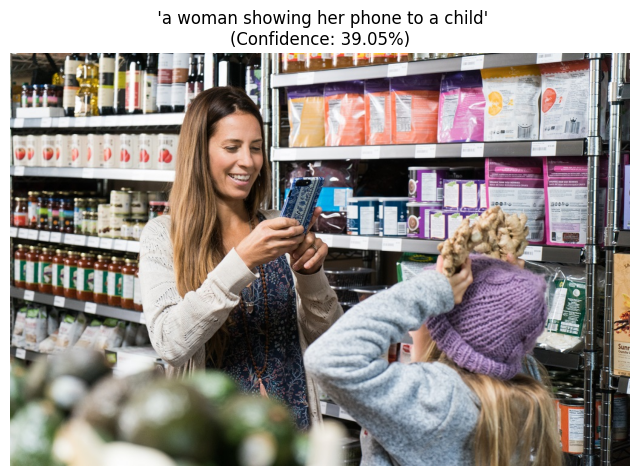

In [3]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
from python_code import vision
import os
%matplotlib inline

# Get the path to an image file
image_path = os.path.join('data', 'vision', 'store_cam1.jpg')

# Get a client for the computer vision service
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Get a description from the computer vision service
image_stream = open(image_path, "rb")
description = computervision_client.describe_image_in_stream(image_stream)

# Display image and caption (code in helper_scripts/vision.py)
vision.show_image_caption(image_path, description)


Parece bastante acertado.

Vamos a probar con otra imagen.

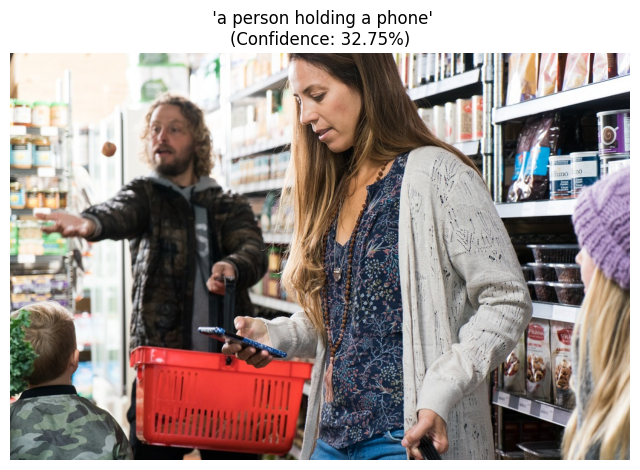

In [4]:
# Get the path to an image file
image_path = os.path.join('data', 'vision', 'store_cam2.jpg')

# Get a description from the computer vision service
image_stream = open(image_path, "rb")
description = computervision_client.describe_image_in_stream(image_stream)

# Display image and caption (code in helper_scripts/vision.py)
vision.show_image_caption(image_path, description)

Parece que la información sigue siendo precisa.

## Analizar características de una imagen

Hasta ahora, hemos usado Computer Vision para generar una descripción de algunas imágenes. Podemos ir mucho más allá. El servicio Computer Vision incluye capacidades de análisis que pueden extraer información detallada como esta:

- Las ubicaciones de tipos habituales de objetos detectados en la imagen.
- La ubicación y edad aproximada de las caras humanas de la imagen.
- Si la imagen incluye contenido adulto, racista o inapropiado.
- Etiquetas relevantes que se pueden asociar con la imagen en una base de datos para que sea más fácil encontrarla.

Ejecute el siguiente código para analizar la imagen de un cliente.

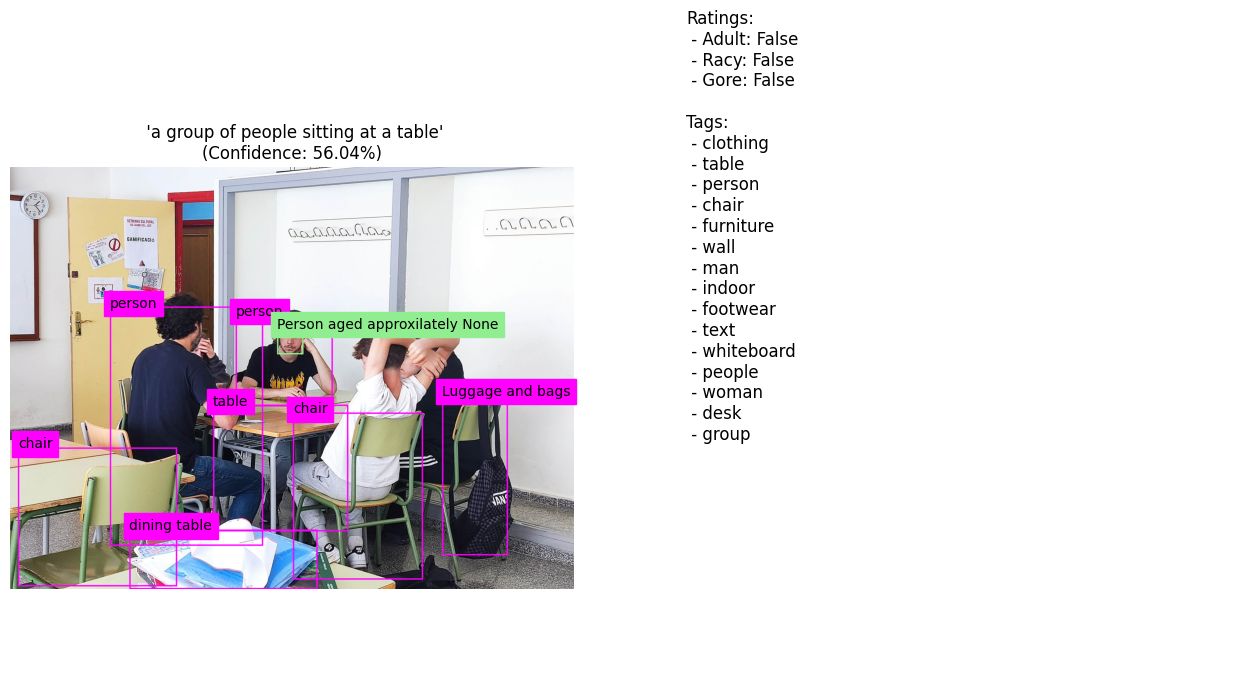

In [5]:
# Get the path to an image file
# image_path = os.path.join('data', 'vision', 'store_cam1.jpg')
image_path = os.path.join('data', 'vision', 'jocs.jpg')
# image_path = os.path.join('meues', 'Paco.jpeg')

# Specify the features we want to analyze
features = ['Description', 'Tags', 'Adult', 'Objects', 'Faces']

# Get an analysis from the computer vision service
image_stream = open(image_path, "rb")
analysis = computervision_client.analyze_image_in_stream(image_stream, visual_features=features)

# Show the results of analysis (code in helper_scripts/vision.py)
vision.show_image_analysis(image_path, analysis)

## Más información

Además de las capacidades tratadas en este cuaderno, Computer Vision incluye la capacidad para lo siguiente:

- Identificar personas famosas en imágenes.
- Detectar logos de marcas en una imagen.
- Usar reconocimiento óptico de caracteres (OCR) para leer el texto de una imagen.

Para más información sobre el servicio Computer Vision, de Cognitive Services, consulte la [documentación de Computer Vision](https://docs.microsoft.com/azure/cognitive-services/computer-vision/).
